In [ ]:
<h3> spam Message Detection - Name [swathija btech-AML]

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2919,ham,"Thanx 4 the time we��ve spent 2geva, its bin m...",NaN,NaN,NaN
1491,spam,Your account has been credited with 500 FREE T...,NaN,NaN,NaN
1203,ham,Thanks for understanding. I've been trying to ...,NaN,NaN,NaN
5041,spam,Jamster! To get your free wallpaper text HEART...,NaN,NaN,NaN
1741,ham,I can do that! I want to please you both insid...,NaN,NaN,NaN


<h3>We will cover 8 main steps </h3>

1. Data cleaning
2. EDA
3. Text Preproccessing
4. Model Building
5. Evaluation
6. Improvement
7. Webiste
8. Deploy

In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(4)

,v1,v2
1056,ham,Then u drive lor.
913,ham,Ok lor but not too early. Me still having proj...
3980,ham,Huh i cant thk of more oredi how many pages do...
4800,ham,The guy at the car shop who was flirting with ...


In [8]:
# We will change the column name for better understanding...

df=df.rename(columns={'v1':'target','v2':'sms'})

In [9]:
#Chaning the target column values into numeric form

from sklearn.preprocessing import LabelEncoder

In [10]:
lb = LabelEncoder()

df['target'] = lb.fit_transform(df['target'])

In [11]:
#Checking for duplicate value and data has no missing value anymore...
df.duplicated().sum()

403

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(5169, 2)

<h1> 2 . EDA Process

In [14]:
df.head(2)

,target,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [15]:
import matplotlib.pyplot as plt

In [16]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

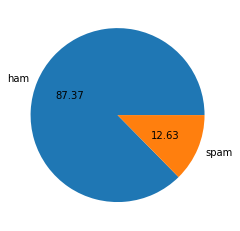

In [17]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%.2f')
plt.show()

#DATA is imbalance

In [18]:
# Lets check how many alphabets , words and sentences had used in msgs.

In [19]:
!pip install nltk

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df['num_characters'] = df['sms'].apply(len)

In [23]:
df.sample(2)

,target,sms,num_characters
691,0,Sorry to trouble u again. Can buy 4d for my da...,109
72,0,HI BABE IM AT HOME NOW WANNA DO SOMETHING? XX,45


In [24]:
df['num_words'] = df['sms'].apply(lambda x : nltk.word_tokenize(x)).apply(len)

In [25]:
df['num_sentences'] = df['sms'].apply(lambda x : nltk.sent_tokenize(x)).apply(len)

In [26]:
df

,target,sms,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,0,Will �_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [27]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [30]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

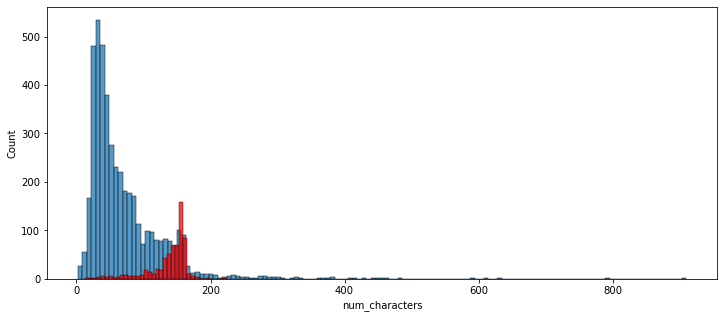

In [31]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='r')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

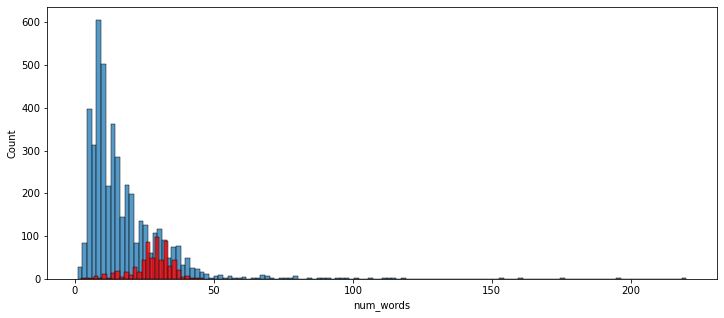

In [32]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='r')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

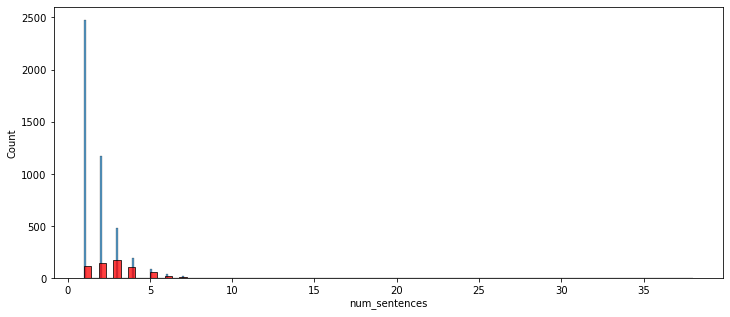

In [33]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'],color='r')

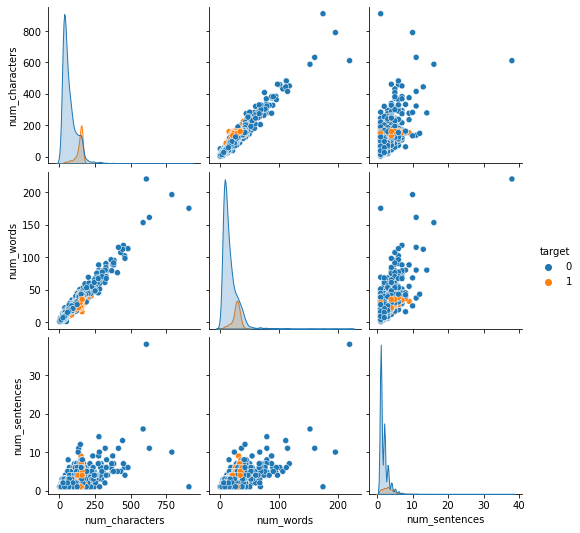

In [34]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

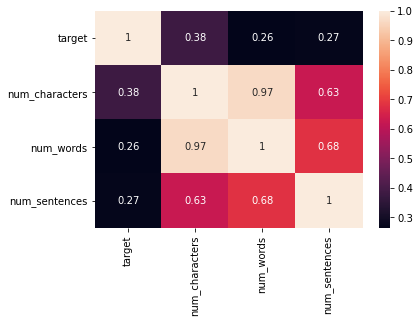

In [35]:
sns.heatmap(df.corr(),annot=True)

# Through this heatmap we can assume that num_character gives us more clear scnerio for the target column and has
# good co-relation with other column.

<h1> 3. Data Preprocessing
    <h5><li>Lower case
    <h5><li>Toeknize
    <h5><li>Removing special characters
    <h5><li>Removing stoping words
    <h5><li>Stemming

In [36]:
!pip install string

ERROR: Could not find a version that satisfies the requirement string
ERROR: No matching distribution found for string


In [37]:
import string
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english'))


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
ps.stem('rising')

'rise'

In [183]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from string import punctuation
punctuation

from nltk.stem import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [184]:

def Datapreprocessing(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y.copy()
    y.clear()
    
    for i in text:
        if i not in string.punctuation and i not in stopwords.words('english'):
            y.append(i)
         
    text = y.copy()
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    text = y[:]
    y.clear()
    
    text = " ".join(text)
    return text

In [41]:
Datapreprocessing('Go until jurong point, crazy.!. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point avail bugi n great world la e buffet cine got amor wat'

In [42]:
df['sms'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [43]:
df['transformed_sms'] = df['sms'].apply(Datapreprocessing)

In [44]:
df

,target,sms,num_characters,num_words,num_sentences,transformed_sms
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will �_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [45]:
# Lets check which words are commenly used in spam and ham.

In [46]:
! pip install wordcloud

In [47]:
from wordcloud import WordCloud

In [48]:
wc = WordCloud(width=500,height=500,background_color='white',min_font_size=10)

In [49]:
#%pip install --upgrade Pillow

In [50]:
#pip install --upgrade numpy

In [51]:
wc_spam = wc.generate(df[df['target'] == 1]['transformed_sms'].str.cat(sep=" "))

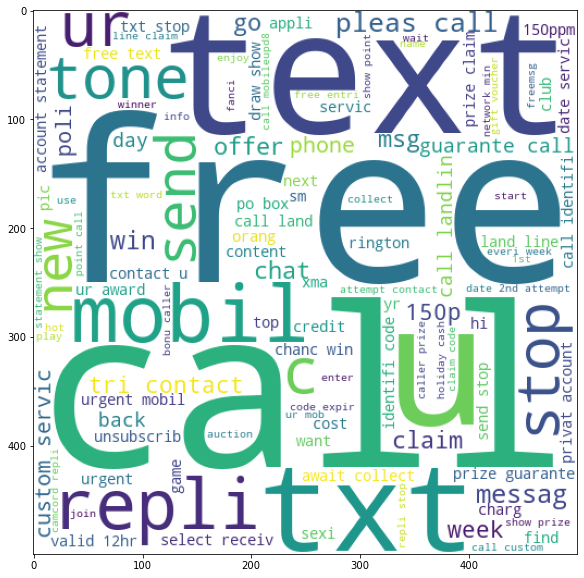

In [52]:
plt.figure(figsize=(10,10))
plt.imshow(wc_spam)

In [53]:
wc_ham = wc.generate(df[df['target'] == 0]['transformed_sms'].str.cat(sep=" "))

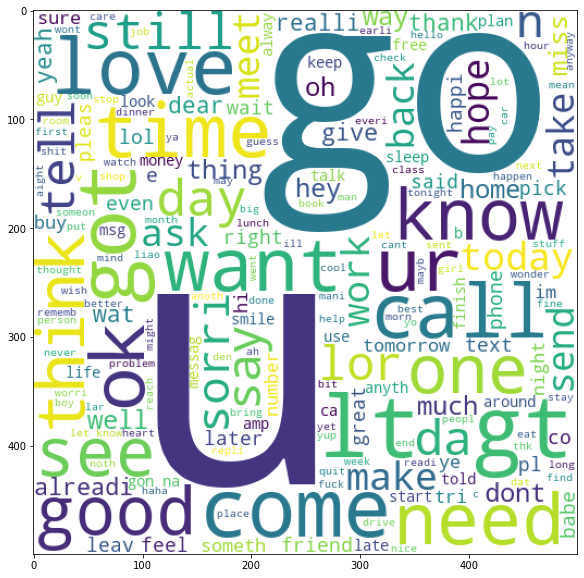

In [54]:
plt.figure(figsize=(10,10))
plt.imshow(wc_ham)

In [55]:
spam_list = []
my_string = ''

#df[df['target']==1]['transformed_sms'].tolist()
for sms in df[df['target']==1]['transformed_sms'].tolist():
    for cut in sms.split():
        spam_list.append(cut)

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


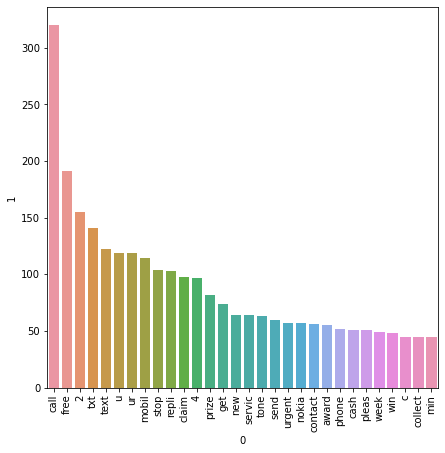

In [56]:
plt.figure(figsize=(7,7))
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_list).most_common(30))[0],pd.DataFrame(Counter(spam_list).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [57]:
ham_list = []
my_string = ''
for i in df[df['target'] == 0]['transformed_sms'].tolist():
    for x in i.split():
        ham_list.append(x)

In [58]:
ham_list

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'way',
 'u',
 

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


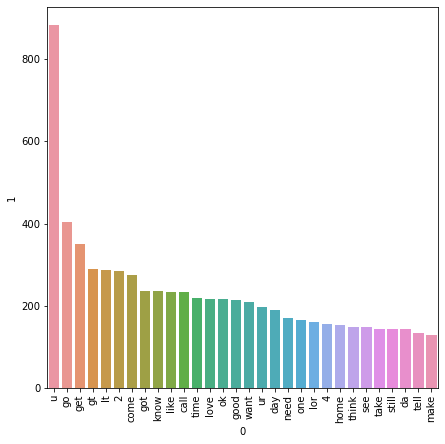

In [59]:
plt.figure(figsize=(7,7))
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_list).most_common(30))[0],pd.DataFrame(Counter(ham_list).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [60]:
df

,target,sms,num_characters,num_words,num_sentences,transformed_sms
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will �_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


<h1> 4 . Model Building

In [155]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [156]:
X = tfidf.fit_transform(df['transformed_sms']).toarray()

In [157]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [158]:
y = df['target'].values

In [159]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.2)

In [164]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [165]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [166]:
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
print('Accuracy Score : ',accuracy_score(y_test,y_pred_gnb))
print('Accuracy Score : ',confusion_matrix(y_test,y_pred_gnb))
print('Precision Score : ',precision_score(y_test,y_pred_gnb))

Accuracy Score :  0.8704061895551257
Accuracy Score :  [[788 108]
 [ 26 112]]
Precision Score :  0.509090909090909


In [167]:
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
print('Accuracy Score : ',accuracy_score(y_test,y_pred_mnb))
print('Accuracy Score : ',confusion_matrix(y_test,y_pred_mnb))
print('Precision Score : ',precision_score(y_test,y_pred_mnb))

Accuracy Score :  0.971953578336557
Accuracy Score :  [[896   0]
 [ 29 109]]
Precision Score :  1.0


In [168]:
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
print('Accuracy Score : ',accuracy_score(y_test,y_pred_bnb))
print('Accuracy Score : ',confusion_matrix(y_test,y_pred_bnb))
print('Precision Score : ',precision_score(y_test,y_pred_bnb))

Accuracy Score :  0.9835589941972921
Accuracy Score :  [[895   1]
 [ 16 122]]
Precision Score :  0.991869918699187


In [169]:
!pip install xgboost

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [171]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [172]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [173]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [174]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9748549323017408, 0.9745762711864406)

In [175]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.971953578336557
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8235294117647058
For  LR
Accuracy -  0.9564796905222437
Precision -  0.9696969696969697
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9593810444874274
Precision -  0.8692307692307693
For  ETC
Accuracy -  0.9796905222437138
Precision -  0.975609756097561
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9278350515463918
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9411764705882353


In [152]:
#performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [160]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
8,ETC,0.977756,0.991453
5,RF,0.970019,0.990826
0,SVC,0.972921,0.974138
10,xgb,0.971954,0.957983
6,AdaBoost,0.962282,0.954128
4,LR,0.951644,0.940000
9,GBDT,0.951644,0.931373
7,BgC,0.957447,0.861538


In [161]:
#for improving model performance , we will change Tfidf max_feature = 3000 for improvement

In [176]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [177]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [178]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.971954,1.000000
2,ETC,0.977756,0.991453,0.979691,0.975610
3,RF,0.970019,0.990826,0.975822,0.982906
4,SVC,0.972921,0.974138,0.974855,0.974576
5,xgb,0.971954,0.957983,0.968085,0.941176
6,AdaBoost,0.962282,0.954128,0.961315,0.945455
7,LR,0.951644,0.940000,0.956480,0.969697
8,GBDT,0.951644,0.931373,0.946809,0.927835
9,BgC,0.957447,0.861538,0.959381,0.869231


In [181]:
#here we can say NB acts as best model.

In [88]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
rf = RandomForestClassifier
kn = KNeighborsClassifier()
from sklearn.ensemble import VotingClassifier

In [90]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc),('kn',kn)],voting='soft')

In [91]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('kn', KNeighborsClassifier())],
                 voting='soft')

In [92]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9738878143133463
Precision 1.0


Although i am having 
Accuracy 0.9816247582205029
Precision 0.9917355371900827 for (svm,mn,etc) classifiers however for model precision matters.

In [185]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))